# Logistic Regression

Statistical method used for classification problems , the goal is to predict the class labels of new dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

## EDA

In [3]:
X=pd.DataFrame(load_breast_cancer().data)
y=pd.DataFrame(load_breast_cancer().target)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y[0].value_counts()

1    357
0    212
Name: 0, dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
0     569 non-null float64
1     569 non-null float64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
dtypes: float64(30)
memory usage: 133.4 KB


In [5]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Model 

Importing the logistic regression model from sklearn 

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression()      #initializing the model

### Spliting the data

In [8]:
from sklearn.cross_validation import train_test_split

C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 30)
(381, 1)
(188, 30)
(188, 1)


### Training the model

In [11]:
clf.fit(X_train,y_train)

C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction

In [12]:
pred = clf.predict(X_test)

## Evaluation

In [13]:
y_test.mean()

0    0.643617
dtype: float64

In [14]:
clf.score(X_train,y_train)

0.95538057742782156

In [15]:
clf.score(X_test,y_test)

0.95744680851063835

The model is giving over 95% of accuracy for both train and test set, which is a pretty good accuracy

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 63,   4],
       [  4, 117]], dtype=int64)

## Trying different Values of Parameter **C**

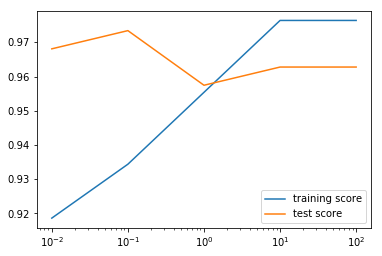

In [17]:
c = [0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for i in c:
    clf = LogisticRegression(C=i)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
    
plt.plot(c, train_score, label="training score")
plt.plot(c, test_score, label="test score")
plt.xscale('log')
plt.legend()

In [18]:
clf

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
clf.intercept_

array([ 3.58106336])

In [20]:
clf.coef_

array([[  7.79246892e+00,   4.79709426e-01,  -7.61055269e-01,
         -3.28134142e-02,  -2.30571819e+00,   7.01203189e-01,
         -3.48461986e+00,  -5.50336371e+00,  -2.35872253e+00,
          3.14886107e-01,  -1.78134906e+00,   4.72388903e+00,
          5.44679518e-01,  -2.27080761e-01,  -5.22859149e-01,
          2.32950174e+00,   2.91963372e+00,  -5.54106794e-01,
         -1.64827918e-01,   4.19012649e-01,  -3.05583108e-01,
         -8.75806016e-01,   2.70451836e-02,  -9.76472961e-04,
         -5.60680830e+00,   3.68683131e+00,  -4.90893107e+00,
         -7.81816894e+00,  -8.54686843e+00,   8.55686298e-01]])